In [25]:
# Import Packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

 Question 1：Linear Regression

In [26]:
#load the dataset
data_path = os.path.join(os.getcwd(),'data','regression_part1.csv')
lineardata = pd.read_csv(data_path, delimiter = ','); 
print(lineardata.max())
print(lineardata.min())

revision_time    48.011
exam_score       94.945
dtype: float64
revision_time     2.723
exam_score       14.731
dtype: float64


(a)Information of data

In [27]:
lineardata.info()
lineardata.head(50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
revision_time    50 non-null float64
exam_score       50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974
5,4.080,27.086
6,5.674,26.136
7,6.060,27.038
8,6.347,31.283
9,6.819,14.731


In [28]:
lineardata.shape

(50, 2)

(b)Linear Regression model from sklearn

In [29]:
lineardatax1 = lineardata['revision_time']
a=np.ones((50,1))
lineardatax = np.c_[a,lineardatax1]
lineardatay = lineardata['exam_score']
reg = LinearRegression(fit_intercept=False)
reg.fit(lineardatax,lineardatay)
reg.score(lineardatax,lineardatay)
pred_y=reg.predict(lineardatax)
print(reg.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)>


In [30]:
reg.coef_

array([17.89768026,  1.44114091])

plot data

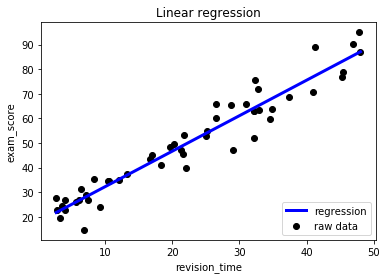

In [31]:
plt.scatter(lineardatax1,lineardatay,color='black',label='raw data')
plt.plot(lineardatax1,pred_y,color='blue',linewidth=3,label='regression')

plt.ylabel('exam_score')
plt.xlabel('revision_time')
plt.title('Linear regression')
plt.legend(loc="lower right")

plt.show()

compute w by numpy

In [32]:
b=np.linalg.inv(lineardatax.T.dot(lineardatax))
w2=b.dot(lineardatax.T.dot(lineardatay))
print(w2)
pred_y2=w2.dot(lineardatax.T)
print(pred_y2)

[17.89768026  1.44114091]
[21.82190694 21.99628499 22.65776867 23.06849383 23.73430093 23.77753515
 26.07471376 26.63099415 27.04460159 27.72482009 28.12689841 28.72785416
 29.93985366 31.17635256 32.8336646  33.04407117 35.3383675  36.90200538
 41.95320425 42.36392941 44.31379306 46.14260086 47.1831046  48.56515873
 48.99461872 49.31166972 49.67195494 53.85270471 54.13805061 56.08070855
 56.13835418 59.23968941 59.77002927 62.63501739 64.26783003 64.30674084
 64.33988708 64.400415   65.03884042 65.29104007 67.60118895 68.17764531
 71.65079489 76.80431477 77.34330147 83.05598402 83.32115394 85.52033496
 86.81015607 87.08829627]


MSE evaluation for two prediction

In [33]:
MSE1=mean_squared_error(lineardatay,pred_y)
MSE2=mean_squared_error(lineardatay,pred_y2)
print(MSE1)
d=MSE1-MSE2
print(d)

30.9854726145413
1.4210854715202004e-14


plot MSE-w1

32.48096161535148
1.3535353535353538


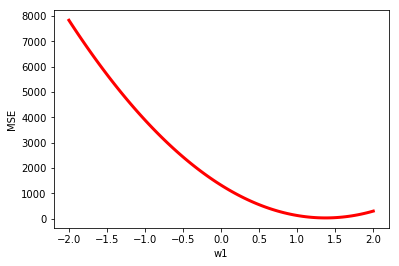

In [34]:
w1=np.linspace(-2,2,100).tolist()
m=None
for n in w1:
    pred_y1 = 20+n*lineardatax1
    MSE=mean_squared_error(lineardatay,pred_y1).tolist()
    m=np.append(m,MSE,axis=None)
m=np.delete(m,0,axis=0)
print(min(m))
c=np.argmin(m)
print(w1[c])
plt.plot(w1,m,color='red',linewidth=3)

plt.xlabel('w1')
plt.ylabel('MSE')

plt.show()

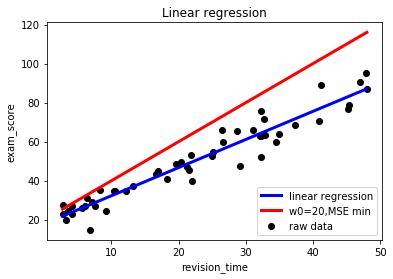

In [35]:
plt.scatter(lineardatax1,lineardatay,color='black',label='raw data')
plt.plot(lineardatax1,pred_y,color='blue',linewidth=3,label='linear regression')
plt.plot(lineardatax1,pred_y1,color='red',linewidth=3,label='w0=20,MSE min')

plt.ylabel('exam_score')
plt.xlabel('revision_time')
plt.title('Linear regression')
plt.legend(loc="lower right")
plt.show()

this value is not to be expected. Using minimum MSE to find the weight of linear regression will deviate from the expected regression in large scale when trainning data point distribution is mainly located in some area.

Nonlinear Regression

In [36]:
data_path = os.path.join(os.getcwd(),'data','regression_part2.csv')
nonlineardata = pd.read_csv(data_path, delimiter = ',')
nonlineardataxy = np.asarray(nonlineardata)
nonlineardata_s = nonlineardataxy[np.lexsort(nonlineardataxy[:,::-1].T)]

In [37]:
nonlineardata_s.shape
nonlineardata.head()

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437


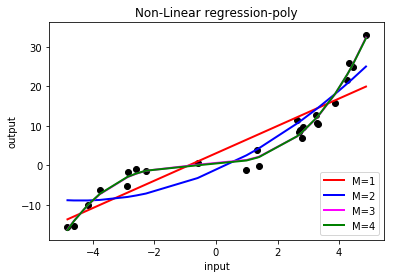

In [38]:
o=np.ones((25,1))
nonlinearx0=nonlineardata_s[:,0]
nonlineary = nonlineardata_s[:,1]
nonlinearx1 = np.c_[o,nonlinearx0]
for n in range(1,5):
    poly = PolynomialFeatures(n,interaction_only=False,include_bias=False)
    x_fit=poly.fit_transform(nonlinearx1)
    nonreg = LinearRegression(fit_intercept=False)
    nonreg.fit(x_fit,nonlineary)
    non_w=nonreg.coef_
    nonpred_y=nonreg.predict(x_fit)
    m1=None
    nonMSE=mean_squared_error(nonlineary,nonpred_y).tolist()
    m1=np.append(m1,nonMSE,axis=None)
    m1=np.delete(m1,0,axis=0).T
    if n==1:
        plt.plot(nonlinearx0,nonpred_y,color='red',linewidth=2,label='M=1')
    if n==2:
        plt.plot(nonlinearx0,nonpred_y,color='blue',linewidth=2,label='M=2')
    if n==3:
        plt.plot(nonlinearx0,nonpred_y,color='Magenta',linewidth=2,label='M=3')
    if n==4:
        plt.plot(nonlinearx0,nonpred_y,color='green',linewidth=2,label='M=4')
plt.ylabel('output')
plt.xlabel('input')
plt.title('Non-Linear regression-poly')
plt.legend(loc="lower right")
plt.scatter(nonlinearx0,nonlineary,color='black')

bar plot for MSE

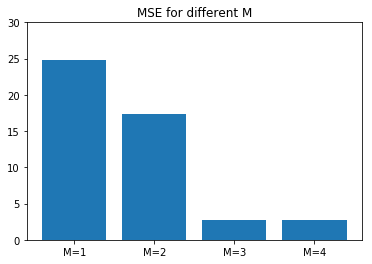

In [39]:
fig,ax = plt.subplots()
M=np.arange(4)
y=[24.744378032672856,17.352926937873296,2.7447567192524263,2.7389111790755383]
plt.bar(M,y)
ax.set_ylim(0,30)
plt.xticks(M,('M=1','M=2','M=3','M=4'))
plt.title('MSE for different M')
plt.show()

comment on M=3 and M=4
Both of fit result and Mean Squared Error are almost in the same performance with tiny difference.
In the figure, we can't distinct any different between M=3 and M=4. But we will find the difference when look at every data point in detial.Also, MSE of M=4 is a little smaller than M=3.
Generally, I would say both of M=3 and M=4 are have a great performance on trainning data. But I will choose M=3 for general prediction. Because M=4 is a more complicate model. When outliers is in the trainning data, M=4 model will have overreaction and will not be a expected model.

regression with RBF

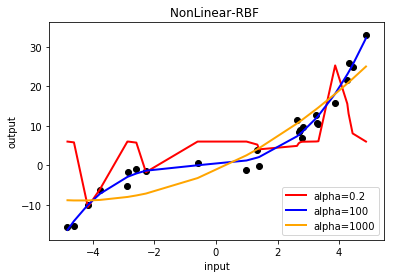

In [40]:
for n in range(1,4):
    phi=np.zeros((25,4))
    if n==1:
        alpha=0.2
    if n==2:
        alpha=100
    if n==3:
        alpha=1000
        
    for i in range(0,25):
        for j in range(0,4):
            if j==0:
                c=-4.0
            if j==1:
                c=-2.0
            if j==2:
                c=2.0
            if j==3:
                c=4.0
            phi[i][j]=np.exp(-0.5*(nonlinearx0[i]-c)*(nonlinearx0[i]-c)/(alpha*alpha))
    phi0=np.c_[o,phi]
    rbfreg=LinearRegression(fit_intercept=False)
    rbfreg.fit(phi0,nonlineary)
    w_rbf=rbfreg.coef_
    rbfpred_y=rbfreg.predict(phi0)
    if n==1:
        plt.plot(nonlinearx0,rbfpred_y,color='red',linewidth=2,label='alpha=0.2')
    if n==2:
        plt.plot(nonlinearx0,rbfpred_y,color='blue',linewidth=2,label='alpha=100')
    if n==3:
        plt.plot(nonlinearx0,rbfpred_y,color='orange',linewidth=2,label='alpha=1000')
    
plt.ylabel('output')
plt.xlabel('input')
plt.title('NonLinear-RBF ')
plt.legend(loc='lower right')
plt.scatter(nonlinearx0,nonlineary,color='black')

Comment on the impact of 


Decision Trees

In [41]:
data_path1 = os.path.join(os.getcwd(),'data','faces_train_data.csv')
facetrain = pd.read_csv(data_path1, delimiter = ','); 
data_path2 = os.path.join(os.getcwd(),'data','faces_test_data.csv')
facetest = pd.read_csv(data_path2, delimiter = ',');

print(facetrain.shape)
print(facetest.shape)

(4800, 137)
(1200, 137)


3.92
3.9010000000000002
-3.9789999999999996
-3.846


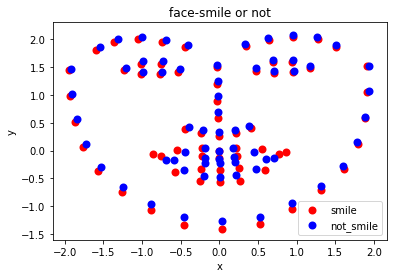

In [42]:
facetrain=np.asarray(facetrain)
facetest=np.asarray(facetest)
print(facetrain.max())
print(facetest.max())
print(facetrain.min())
print(facetest.min())
train_result=facetrain[:,136]
test_result=facetest[:,136]
train_data=np.delete(facetrain,136,axis=1)
test_data=np.delete(facetest,136,axis=1)
train_T=train_data[np.where(train_result==1)]
train_F=train_data[np.where(train_result==0)]
smile_mean=np.mean(train_T,axis=0)
nonsmile_mean=np.mean(train_F,axis=0)
smile_mean=smile_mean.reshape(68,2)
nonsmile_mean=nonsmile_mean.reshape(68,2)
x_smile=smile_mean[:,0]
y_smile=smile_mean[:,1]
y_nonsmile=nonsmile_mean[:,1]
x_nonsmile=nonsmile_mean[:,0]
plt.scatter(x_smile,y_smile,color='red',linewidth=2,label='smile')
plt.scatter(x_nonsmile,y_nonsmile,color='blue',linewidth=2,label='not_smile')
plt.ylabel('y')
plt.xlabel('x')
plt.title('face-smile or not')
plt.legend(loc="lower right")

b) profil of face, jaw, eyes, eyebrow, nose and mouth are described by a serious of 2-D point. The main different between smiling and not smiling is the edge of jaw,mouth and some part of nose and eyebrow.

c)The measurement of purity at node that DecisionTreeClassifier in sklearn use for is Gini index. The advantage of using Gini compared to entroy is Gini will have a faster runing efficiency because entroy use log function but gini don't.

d)small values:will be underfit to the real world. Complexity of the model will be low. only some of the attributes are considered in this model, which will be not powerful enough to capture salient patterns in data. So the error rate in both train data and test data will be high also.
large number:
1.will be overfitting to the real world. Complexity of the model will be high, some noise or outliers in train data will impact the model badly.
2.large depth of the tree also make some of the node contain 1 example and this singleton is pure， which will mislead the model.patterns of train data will not re-appear.

In [43]:
for n in[2,8,20]:
    de_tree=DecisionTreeClassifier(max_depth=n,random_state=2001)
    de_tree.fit(train_data,train_result)
    y_pred=de_tree.predict(train_data)
    print('train accuracy',accuracy_score(train_result, y_pred))
    y_pred=de_tree.predict(test_data)
    print('test accuracy',accuracy_score(test_result, y_pred))
    print(de_tree.get_depth())

train accuracy 0.7947916666666667
test accuracy 0.7816666666666666
2
train accuracy 0.9335416666666667
test accuracy 0.8408333333333333
8
train accuracy 1.0
test accuracy 0.815
17


In [44]:
de_tree=DecisionTreeClassifier(max_depth=8,random_state=2001)
de_tree.fit(train_data,train_result)
y_pred=de_tree.predict(train_data)
data_path11 = os.path.join(os.getcwd(),'data','faces_train_data.csv')
face11 = pd.read_csv(data_path1, delimiter = ','); 
face11.drop(['smiling'],axis=1,inplace=True)
importance_feature=pd.Series(data=de_tree.feature_importances_,index=face11.columns)
display(importance_feature[importance_feature>0.01])
#x50=0.330405,y48=0.089959,y29=0.088314
print(type(de_tree.feature_importances_.shape))

y7     0.035544
y8     0.032754
y29    0.088314
y32    0.017424
y48    0.089959
x49    0.042056
x50    0.330405
x53    0.087376
y53    0.017377
x54    0.012057
x60    0.031959
y62    0.012946
x64    0.019646
y64    0.024446
dtype: float64

<class 'tuple'>


Question 4

In [45]:
data_path3 = os.path.join(os.getcwd(),'data','classification_eval_1.csv')
eval = pd.read_csv(data_path3, delimiter = ',')
eval.head()

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736


In [46]:
gt=eval['gt']
alg1=np.rint(eval['alg_1'])
alg2=np.rint(eval['alg_2'])
alg3=np.rint(eval['alg_3'])
alg4=np.rint(eval['alg_4'])
print(accuracy_score(gt, alg1))
print(accuracy_score(gt, alg2))
print(accuracy_score(gt, alg3))
print(accuracy_score(gt, alg4))


0.616
0.55
0.321
0.329


a)#alg_1 is the best model according to this metric.

In [47]:
g1=eval['alg_1']
g2=eval['alg_2']
g3=eval['alg_3']
g4=eval['alg_4']
AUC1=roc_auc_score(gt,g1)
AUC2=roc_auc_score(gt,g2)
AUC3=roc_auc_score(gt,g3)
AUC4=roc_auc_score(gt,g4)

In [48]:
print(AUC1)
print(AUC2)
print(AUC3)
print(AUC4)

0.7320932281198045
0.6316285763914737
0.06395009801732053
0.8473876522990644


no

In [49]:
fpr1, tpr1, thresholds1 = roc_curve(gt, g1, pos_label=1)
fpr2, tpr2, thresholds1 = roc_curve(gt, g2, pos_label=1)
fpr3, tpr3, thresholds1 = roc_curve(gt, g3, pos_label=1)
fpr4, tpr4, thresholds1 = roc_curve(gt, g4, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

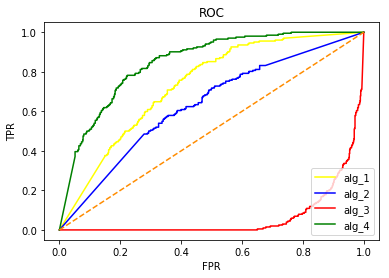

In [57]:
plt.figure()

plt.plot(fpr1, tpr1,color='yellow',label='alg_1')
plt.plot(fpr2, tpr2,color='blue',label='alg_2')

plt.plot(fpr3, tpr3,color='red',label='alg_3')
plt.plot(fpr4, tpr4,color='green',label='alg_4')

plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Question 5

In [51]:
def entropy(num_T,num_F):
    Pt=num_T/(num_T+num_F)
    Pf=num_F/(num_T+num_F)
    return -Pt*math.log(Pt,2)-Pf*math.log(Pf,2)
T=np.sum(train_result==1)
F=np.sum(train_result==0)
H=entropy(T,F)
print(H)

0.9994708218806827


In [52]:
print(H)

0.9994708218806827


In [53]:
x48_T=train_T[:,96]
x48_F=train_F[:,96]
print(x48_F.shape)
print(x48_T.shape)

(2465,)
(2335,)


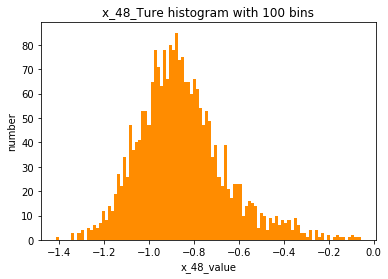

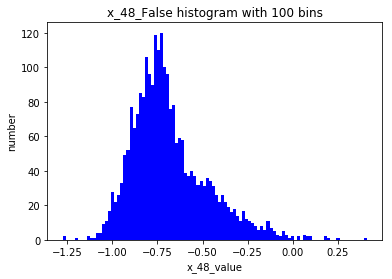

In [54]:
#T=np.arange(2335)
#F=np.arange(2465)
a=plt.hist(x48_T, 100,facecolor='darkorange')
plt.xlabel('x_48_value')
plt.ylabel('number')
plt.title('x_48_Ture histogram with 100 bins')
plt.show()
b=plt.hist(x48_F,100,facecolor='blue')
plt.xlabel('x_48_value')
plt.ylabel('number')
plt.title('x_48_False histogram with 100 bins')
plt.show()

In [55]:
entr_x48=entropy(2335,2465)

for t in [-0.7,-0.9]:
    left_T=x48_T[x48_T<=t]
    right_T=x48_T[x48_T>t]
    left_F=x48_F[x48_F<=t]
    right_F=x48_F[x48_F>t]
    
    num_left_T=left_T.shape[0]
    num_left_F=left_F.shape[0]
    num_right_T=right_T.shape[0]
    num_right_F=right_F.shape[0]
    '''
    print(num_left_T)
    print(num_left_F)
    print(num_right_T)
    print(num_right_F)
    '''
    num_left=num_left_T+num_left_F
    num_right=num_right_T+num_right_F
    
    print(num_left)
    print(num_right)
    entr_left=entropy(num_left_T,num_left_F)
    entr_right=entropy(num_right_T,num_right_F)
    
    print(entr_left)
    print(entr_right)
    
    Inf_gain=entr_x48-(num_left/(num_left+num_right)*entr_left+\
                   num_right/(num_left+num_right)*entr_right)
    print(Inf_gain)

3316
1484
0.9816332033571105
0.8531266817126126
0.05756755146532955
1307
3493
0.7649719900289214
0.9563382433490135
0.09524001459195264


In [56]:
entro1=entropy(18,64)
print(entro1)

0.7592757847892833
